In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import keras

from keras import backend as K

from keras.layers import Dense, Dropout

from keras.optimizers import Adam

from keras.src.legacy.preprocessing.image import ImageDataGenerator

from keras.models import Model

from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score



In [ ]:
train_datagen = ImageDataGenerator(

    rotation_range=10,         # Slight rotation
    width_shift_range=0.1,     # Minimal horizontal shift
    height_shift_range=0.1,    # Minimal vertical shift
    horizontal_flip=True,      # Flips image (remove if direction matters, e.g., text)
    fill_mode="nearest"
)


In [ ]:
test_val_datagen = ImageDataGenerator()

In [ ]:
# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras import layers, models

# base_model = MobileNetV2(
#     input_shape=(128,128,3),
#     include_top=False,
#     weights="imagenet"
# )

# base_model.trainable = False  # VERY IMPORTANT


In [ ]:
# model = models.Sequential([
#     base_model,
#     layers.GlobalAveragePooling2D(),

#     #layers.BatchNormalization(),
#     #layers.Dense(256, activation="relu"),
#     layers.Dropout(0.2),

#     #layers.Dense(128, activation="relu"),
#     layers.Dropout(0.12),

#     layers.Dense(NUM_CLASSES, activation="softmax")
# ])


In [ ]:
DATASET_ROOT = "/content/drive/My Drive/Goslar_dataset_split"

train_path = os.path.join(DATASET_ROOT, "train")
valid_path   = os.path.join(DATASET_ROOT, "val")
test_path  = os.path.join(DATASET_ROOT, "test")


num_train_samples = 1920

num_val_samples = 240

num_test_samples=240

train_batch_size = 32

val_batch_size = 32

test_batch_size=240

image_size = 128

SEED = 42

In [ ]:
train_steps = int(np.ceil(num_train_samples / train_batch_size))

val_steps = int(np.ceil(num_val_samples / val_batch_size))

test_steps= int(np.ceil(num_test_samples / test_batch_size))
class_names=["Slate","Clay","Cement", "Flat_roof_coverings"]

In [ ]:
train_batches = train_datagen.flow_from_directory(

    directory=train_path,

    target_size=(image_size, image_size),

    batch_size=train_batch_size,
    #class_mode="categorical",
    shuffle=True,
    seed=SEED

     )

Found 1920 images belonging to 4 classes.


In [ ]:

valid_batches = test_val_datagen.flow_from_directory(

    directory=valid_path,

    target_size=(image_size, image_size),

    batch_size=val_batch_size,
    #class_mode="categorical",
    shuffle=False
    )

Found 240 images belonging to 4 classes.


In [ ]:
test_batches = test_val_datagen.flow_from_directory(

    test_path,

    target_size=(image_size, image_size),

    batch_size=test_batch_size,

    shuffle=False)

Found 240 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Initialize MobileNetV3-Large with your specific input size
base_model = tf.keras.applications.MobileNetV3Large(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

# 2. Build the final classification model
model = models.Sequential([
    base_model,
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3), # Essential for a small dataset of 1920 images
    layers.Dense(4, activation='softmax') # 5 = your roof classes
])

# 3. Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/applications/mobilenet_v3.py:517: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

callbacks = [
    EarlyStopping(
        monitor="val_loss",
        patience=8,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.3,
        patience=3,
        min_lr=1e-6,
        verbose=1
    ),
    ModelCheckpoint(
        "best_model.h5",
        monitor="val_loss",
        save_best_only=True,
        verbose=1
    )
]


In [ ]:
def graph(history):
  import matplotlib.pyplot as plt
  plt.figure(figsize=(16,6))
  plt.subplot(1,2,1)
  nepochs=len(history.history['loss'])
  plt.plot(range(nepochs), history.history['loss'],     'r-', label='train')
  plt.plot(range(nepochs), history.history['val_loss'], 'b-', label='validation')
  plt.legend(prop={'size': 20})
  plt.ylabel('loss')
  plt.xlabel('# of epochs')
  plt.subplot(1,2,2)
  plt.plot(range(nepochs), history.history['accuracy'],     'r-', label='train')
  plt.plot(range(nepochs), history.history['val_accuracy'], 'b-', label='validation')
  plt.legend(prop={'size': 20})
  plt.ylabel('accuracy')
  plt.xlabel('# of epochs')

In [ ]:
c=0
base_model = tf.keras.applications.MobileNetV3Large(input_shape=(128, 128, 3), include_top=False, weights='imagenet', include_preprocessing=True)
for layer in base_model.layers:
  c=c+1
print(c)

/usr/local/lib/python3.12/dist-packages/keras/src/applications/mobilenet_v3.py:517: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
187


Epoch 1/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 694ms/step - accuracy: 0.3001 - loss: 1.6846
Epoch 1: val_loss did not improve from 1.01694
60/60 ━━━━━━━━━━━━━━━━━━━━ 58s 820ms/step - accuracy: 0.3007 - loss: 1.6820 - val_accuracy: 0.4083 - val_loss: 1.3712 - learning_rate: 0.0010
Epoch 2/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 688ms/step - accuracy: 0.4135 - loss: 1.3731
Epoch 2: val_loss did not improve from 1.01694
60/60 ━━━━━━━━━━━━━━━━━━━━ 77s 746ms/step - accuracy: 0.4137 - loss: 1.3727 - val_accuracy: 0.5042 - val_loss: 1.2762 - learning_rate: 0.0010
Epoch 3/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 689ms/step - accuracy: 0.4655 - loss: 1.2745
Epoch 3: val_loss did not improve from 1.01694
60/60 ━━━━━━━━━━━━━━━━━━━━ 47s 777ms/step - accuracy: 0.4657 - loss: 1.2740 - val_accuracy: 0.5042 - val_loss: 1.1971 - learning_rate: 0.0010
Epoch 4/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 696ms/step - accuracy: 0.5260 - loss: 1.1458
Epoch 4: val_loss did not improve from 1.01694
60/60 ━━━━━━━━━━━━━━━━━━━━ 46s 758ms/step 

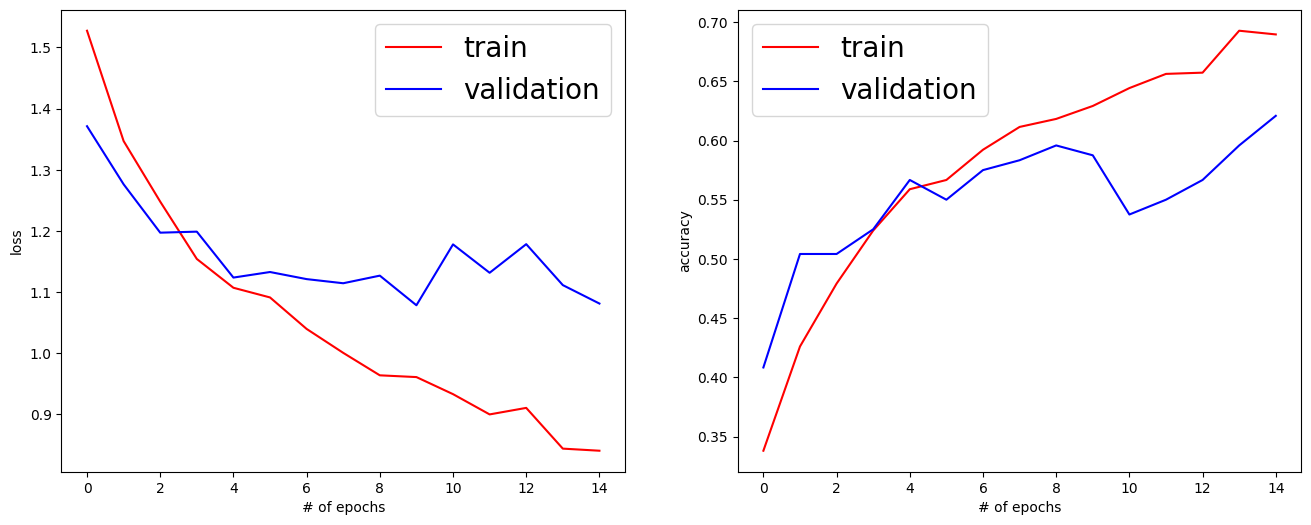

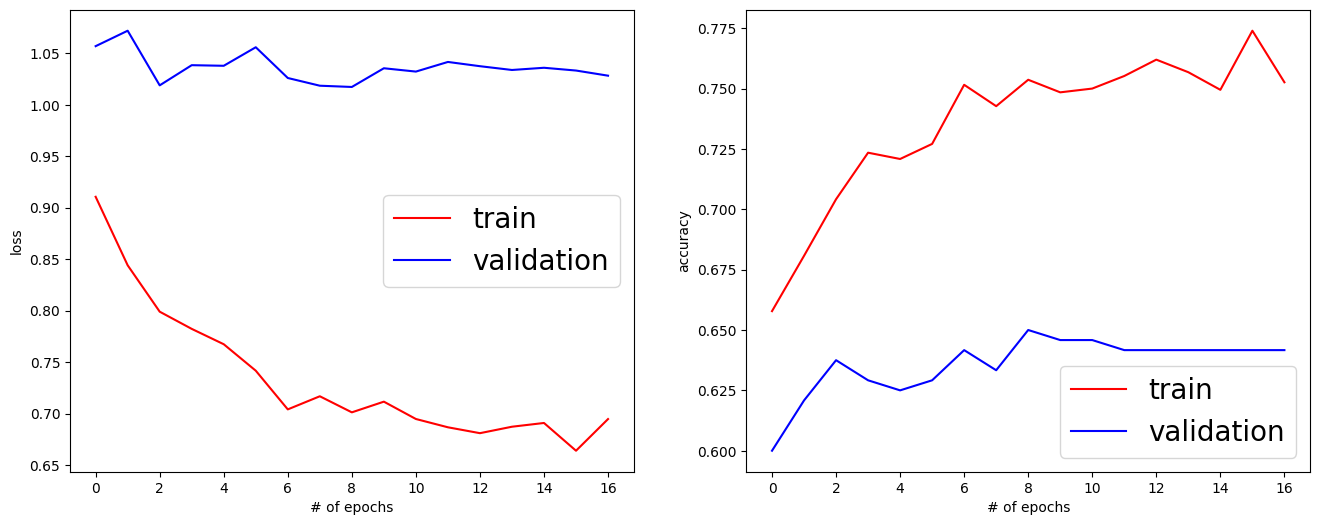

In [ ]:
#Testing
from keras.regularizers import l2


base_model = tf.keras.applications.MobileNetV3Large(input_shape=(128, 128, 3), include_top=False, weights='imagenet', include_preprocessing=True)
base_model.trainable = False

inputs = tf.keras.Input(shape=(128, 128, 3))
#x = tf.keras.applications.mobilenet_v3.preprocess_input(inputs)

x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001))(x)
x = layers.Dropout(0.5)(x)
#x = layers.Dense(128, activation='relu')(x)
#x = layers.Dropout(0.3)(x)
outputs = layers.Dense(4, activation='softmax')(x)
model = models.Model(inputs, outputs)


model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
loss='categorical_crossentropy',
metrics=['accuracy'])


history = model.fit(train_batches, steps_per_epoch=train_steps, validation_data=valid_batches, validation_steps=val_steps, epochs=15, verbose=1, callbacks=callbacks)
graph(history)

base_model.trainable = True
for layer in base_model.layers[-25:]:
    layer.trainable = True

for layer in base_model.layers:
  if isinstance(layer, layers.BatchNormalization):
    layer.trainable = False
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

print("Second phase training")

history = model.fit(train_batches, steps_per_epoch=train_steps, validation_data=valid_batches, validation_steps=val_steps, epochs=50, verbose=1, callbacks=callbacks)
graph(history)



In [ ]:
base_model.summary()

Model: "MobileNetV3Large"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_24      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_11        │ (None, 128, 128,  │          0 │ input_layer_24[0… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv (Conv2D)       │ (None, 64, 64,    │        432 │ rescaling_11[0][… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_bn             │ (None, 64, 64,    │         64 │ conv[0][0]        │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_240      │ (None, 64, 64,    │          0 │ conv_bn[0][0]     │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        144 │ activation_240[0… │
│ (DepthwiseConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │         64 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_228 (ReLU)    │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        256 │ re_lu_228[0][0]   │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_add   │ (None, 64, 64,    │          0 │ activation_240[0… │
│ (Add)               │ 16)               │            │ expanded_conv_pr… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, 64, 64,    │      1,024 │ expanded_conv_ad… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, 64, 64,    │        256 │ expanded_conv_1_… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_229 (ReLU)    │ (None, 64, 64,    │          0 │ expanded_conv_1_… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 65, 65,    │          0 │ re_lu_229[0][0]   │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 32, 32,    │        576 │ expanded_conv_1_… │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 32, 32,    │        256 │ expanded_conv_1_

 Total params: 2,996,352 (11.43 MB)

 Trainable params: 2,947,552 (11.24 MB)

 Non-trainable params: 48,800 (190.62 KB)

In [ ]:
loss, acc = model.evaluate(test_batches)
print("Test accuracy:", acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 1.2615
Test accuracy: 0.5


In [ ]:
def evaluate_model(generator, split_name):
    generator.reset()

    y_true = generator.classes
    y_pred_probs = model.predict(generator)
    y_pred = np.argmax(y_pred_probs, axis=1)

    print(f"\n📊 {split_name.upper()} RESULTS")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(
        y_true,
        y_pred,
        target_names=class_names,
        digits=4
    ))


evaluate_model(test_batches, "Test")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

📊 TEST RESULTS
Accuracy: 0.24166666666666667
                     precision    recall  f1-score   support

              Slate     0.2437    0.9667    0.3893        60
               Clay     0.0000    0.0000    0.0000        60
             Cement     0.0000    0.0000    0.0000        60
Flat_roof_coverings     0.0000    0.0000    0.0000        60

           accuracy                         0.2417       240
          macro avg     0.0609    0.2417    0.0973       240
       weighted avg     0.0609    0.2417    0.0973       240



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


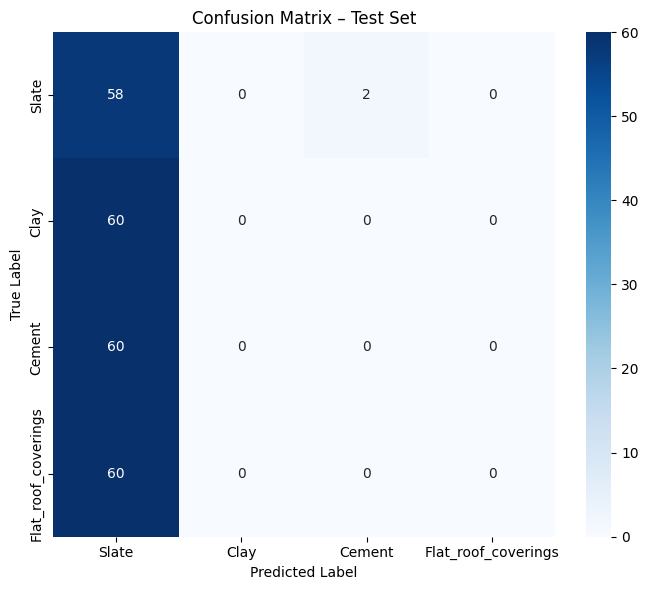

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(model, generator, class_names, title):
    """
    Plots confusion matrix for a given data generator
    """
    generator.reset()

    # Ground truth & predictions
    y_true = generator.classes
    y_pred_probs = model.predict(generator)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(7, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names
    )

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.tight_layout()
    plt.show()


plot_confusion_matrix(
    model,
    test_batches,
    class_names,
    title="Confusion Matrix – Test Set"
)

# **OPTUNA**

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers import l2

def objective(trial):
    # 1. Suggest Search Space for High Performance
    # Fine-tuning usually requires very small learning rates
    lr_phase1 = trial.suggest_float("lr_phase1", 1e-4, 5e-3, log=True)
    lr_phase2 = trial.suggest_float("lr_phase2", 1e-6, 1e-4, log=True)

    # Overfitting Control (Crucial for 90% validation accuracy)
    dropout_rate = trial.suggest_float("dropout", 0.3, 0.7)
    l2_reg = trial.suggest_float("l2_reg", 1e-5, 1e-2, log=True)

    # Model Flexibility
    dense_units = trial.suggest_categorical("dense_units", [64, 128, 256, 512])
    unfreeze_layers = trial.suggest_int("unfreeze_layers", 20, 60)

    # 2. Build Model
    base_model = tf.keras.applications.MobileNetV3Large(
        input_shape=(128, 128, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False

    inputs = tf.keras.Input(shape=(128, 128, 3))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(dense_units, activation='relu', kernel_regularizer=l2(l2_reg))(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(4, activation='softmax')(x)
    model = models.Model(inputs, outputs)

    # 3. Phase 1: Warm-up Top Layers
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_phase1),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_batches, epochs=5, validation_data=valid_batches, verbose=0)

    # 4. Phase 2: Targeted Fine-Tuning
    base_model.trainable = True
    for layer in base_model.layers[:-unfreeze_layers]:
        layer.trainable = False

    # Keep BatchNormalization frozen to prevent mean/variance drift
    for layer in base_model.layers:
        if isinstance(layer, layers.BatchNormalization):
            layer.trainable = False

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr_phase2),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    # Use EarlyStopping to prevent overfitting and return the best val_accuracy
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

    history = model.fit(train_batches, epochs=30, validation_data=valid_batches,
                        callbacks=[early_stop], verbose=0)

    # Optuna optimizes for the highest validation accuracy reached
    return max(history.history['val_accuracy'])

# 5. Execute Optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30) # Increase trials for better results

print(f"Best parameters: {study.best_params}")
